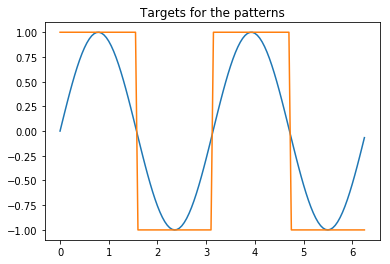

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""Generate data"""
trainSet = np.arange(0, 2*np.pi, 0.1)  #List of [0, 6.2]. 63 elements
testSet = np.arange(0.05, 2*np.pi, 0.1) #List of [0.05, 6.25]. 63 elements
trainTargetSin = np.sin(2*trainSet)
trainTargetSquare = signal.square(2*trainSet)
testTargetSin = np.sin(2*testSet)
testTargetSquare = signal.square(2*testSet)
#Plot to visualize
plotSin = np.stack((trainTargetSin, testTargetSin), axis=1).flatten()
plotSquare = np.stack((trainTargetSquare, testTargetSquare), axis=1).flatten()
plotX = np.stack((trainSet, testSet), axis=1).flatten()
plt.plot(plotX, plotSin)
plt.plot(plotX, plotSquare)
plt.title("Targets for the patterns")
plt.show()

In [3]:
class LeastSquares:
    def __init__(self, train, trainTarget, prototypes):
        self.train = train
        self.trainTarget = trainTarget
        self.prototypes = prototypes
        self.nodes = prototypes.size
        self.beta = np.ones(self.prototypes.size) #Variance - now set to equal for all
        self.phi = self.createPhi()
        self.weights = self.trainWeights()
        
    def createPhi(self):
        """Calls activation to calulate for each row. Puts them together to create phi matrix"""
        p = np.zeros((self.train.size, self.nodes))
        c = 0
        for x in self.train:
            p[:][c] = self.activation(x)
            c += 1
        return p
        
    def activation(self, pattern): 
        """Gauss simplified e^(-beta(x-mu)^2). Calculates for each row"""
        return np.e**(np.multiply(-1*self.beta, (pattern-self.prototypes)**2))
        
    def trainWeights(self):
        """Calculating W = (phi^T * phi)^-1 * phi^T * f. Split for easier reading"""
        phiphi = np.linalg.inv(np.dot(np.transpose(self.phi), self.phi)) #(phi^T * phi)^-1
        phif = np.dot(np.transpose(self.phi), self.trainTarget) #phi^T * f
        return np.dot(phiphi, phif)
        
    def run(self, patterns):
        res = np.zeros(patterns.size)
        c = 0
        for x in patterns:
            res[c] = sum(np.multiply(self.weights, self.activation(x)))
            c += 1
        return res

    def residualError(self, patterns, targets):
        """Calculates residual error"""
        res = self.run(patterns)
        diff = np.absolute(res-targets)
        return np.average(diff)
    
    def residualErrorTransformed(self, patterns, targets):
        """Calculates residual error when all elements > 0 becomes 1 and all else becomes -1"""
        res = self.run(patterns)
        res[res >= 0] = 1
        res[res < 0] = -1
        diff = np.absolute(res-targets)
        return np.average(diff)
        

In [4]:
#SIN

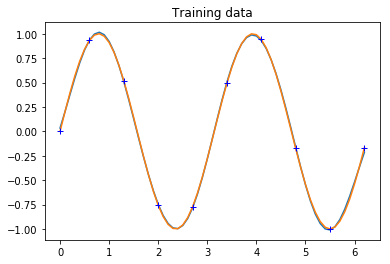

Residual error:  0.0109433642875


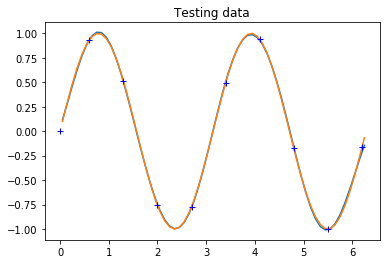

Residual error:  0.0114592418722


In [5]:
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSin, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSin))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet, testTargetSin)
plt.plot(trainSet[index], trainTargetSin[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSin))

In [22]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))
        

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515493969769   -   0.514204650237
3   -   0.514920512299   -   0.514280775436
4   -   0.401847312033   -   0.402498063209
5   -   0.498979558625   -   0.501796089893
6   -   0.136974736335   -   0.139566055483
7   -   0.0440760424417   -   0.0450981050415
8   -   0.0214239937824   -   0.0218427738672
9   -   0.0189990663867   -   0.0191883276986
10   -   0.0109433642875   -   0.0114592418722
11   -   0.0098103604107   -   0.0103318433122
12   -   0.00446144846627   -   0.00467623408806
13   -   0.0039273043293   -   0.00400358115624
14   -   0.0014665242618   -   0.00153424339502
15   -   0.00122941539564   -   0.00125449461563
16   -   0.000423197868307   -   0.000465387526912
17   -   0.000315168705699   -   0.000348064352397
18   -   0.000104423636599   -   0.000123027190597
19   -   0.00157008300588   -   0.00144892083767
20   -   0.208324243829   -   0.186427240323
21   -   1.401342245

In [21]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSin, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSin), "  -  ", ls.residualError(testSet, testTargetSin))

Nodes - Training Error   -   Testing Error
1   -   0.583956639739   -   0.577148105464
2   -   0.515768763789   -   0.514903063841
3   -   0.518059720863   -   0.513862870554
4   -   0.479161557918   -   0.475653569507
5   -   0.416416613848   -   0.413762089454
6   -   0.36420934538   -   0.363780896904
7   -   0.351108133848   -   0.3514146918
8   -   0.44519584244   -   0.441663515252
9   -   0.369588891302   -   0.369791082218
10   -   0.362483543283   -   0.360227489678
11   -   0.375837292642   -   0.374549404396
12   -   0.382907473018   -   0.372378362741
13   -   0.571743130165   -   0.559579814924
14   -   0.44717110895   -   0.436506297431
15   -   0.352072173165   -   0.351748538323
16   -   0.451688436735   -   0.452298936998
17   -   0.478450626749   -   0.47056421377
18   -   0.362721851603   -   0.351952157621
19   -   0.508863962295   -   0.498555113312
20   -   0.609135684837   -   0.580294990683
21   -   0.396825696018   -   0.372887443812
22   -   0.627858592684   -

In [8]:
#SQUARE

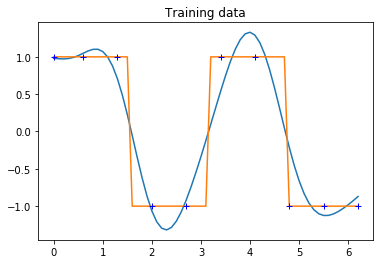

Residual error:  0.268602988991


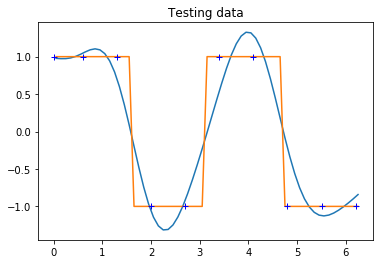

Residual error:  0.269265559993


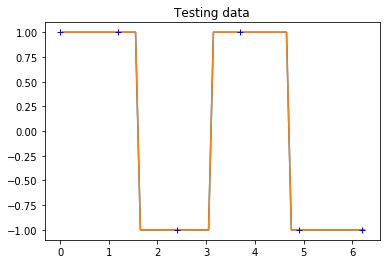

Residual error:  0.0


In [24]:
"""Checking training data error for 10 nodes"""
index = np.linspace(0, trainSet.size-1, num = 10, dtype= int)
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(trainSet, a.run(trainSet))
plt.plot(trainSet, trainTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Training data")
plt.show()
print("Residual error: ", a.residualError(trainSet, trainTargetSquare))

"""Checking testing data error for 10 nodes"""
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))

"""Checking testing data error for 6 nodes - Transformed"""
index = np.linspace(0, trainSet.size-1, num = 6, dtype= int)
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
trans = a.run(testSet)
trans[trans >= 0] = 1
trans[trans < 0] = -1
plt.plot(testSet, trans)
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualErrorTransformed(testSet, testTargetSquare))


In [19]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are evenly spaced"""
print("Nodes - Training Error   -   Testing Error  -  Transformed testing error")
for i in range(1, trainSet.size + 1):
    index = np.linspace(0, trainSet.size-1, num = i, dtype= int)
    ls = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSquare), "  -  ", ls.residualError(testSet, testTargetSquare), "  -  ", ls.residualErrorTransformed(testSet, testTargetSquare))
        

Nodes - Training Error   -   Testing Error  -  Transformed testing error
1   -   0.853794931649   -   0.857625849543   -   0.984126984127
2   -   0.710949033943   -   0.707032775621   -   0.984126984127
3   -   0.710059706986   -   0.707208180309   -   0.634920634921
4   -   0.503136341379   -   0.516079916926   -   0.253968253968
5   -   0.669111828552   -   0.683025999023   -   0.349206349206
6   -   0.29922930634   -   0.296030166208   -   0.0
7   -   0.292502681202   -   0.295783380015   -   0.0634920634921
8   -   0.293842955064   -   0.295541423161   -   0.031746031746
9   -   0.289850330891   -   0.291822686754   -   0.0
10   -   0.268602988991   -   0.269265559993   -   0.031746031746
11   -   0.266571282645   -   0.267092233198   -   0.031746031746
12   -   0.253388606874   -   0.25883916996   -   0.0634920634921
13   -   0.24239744706   -   0.255926300841   -   0.0952380952381
14   -   0.190352302837   -   0.195202265555   -   0.0634920634921
15   -   0.186990590129   -   0.2

In [20]:
"""Comparing residual error for train/test data for different number of nodes in hidden layer.
The prototypes here are clustered from index 0 and forward"""
print("Nodes - Training Error   -   Testing Error")
for i in range(1, trainSet.size + 1):
    ls = LeastSquares(trainSet, trainTargetSquare, trainSet[0:i])
    print(i, "  -  ", ls.residualError(trainSet, trainTargetSquare), "  -  ", ls.residualError(testSet, testTargetSquare))

Nodes - Training Error   -   Testing Error
1   -   0.853794931649   -   0.857625849543
2   -   0.818628697103   -   0.821216651128
3   -   0.835943005366   -   0.838639645925
4   -   0.766083095684   -   0.776436203386
5   -   0.658474071035   -   0.666026454607
6   -   0.624250324588   -   0.635209021539
7   -   0.625942364696   -   0.637329964391
8   -   0.641605957023   -   0.650003447433
9   -   0.70727012185   -   0.717359824491
10   -   0.644139417327   -   0.65234205524
11   -   0.668629927147   -   0.671952952785
12   -   0.693262662258   -   0.675818770664
13   -   0.601725401117   -   0.601004054883
14   -   0.708707957929   -   0.699453632408
15   -   0.476691496377   -   0.49025309681
16   -   0.538401700454   -   0.553423555527
17   -   1.29907615269   -   1.31775254183
18   -   0.531629788797   -   0.531335748275
19   -   0.579548434906   -   0.580554605013
20   -   0.648881445292   -   0.626332146844
21   -   0.802391171797   -   0.815222520874
22   -   1.32811839745   -

In [25]:
#SQUARE experiments with manually chosen prototypes

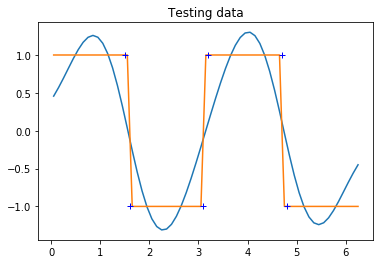

Residual error:  0.319078691206


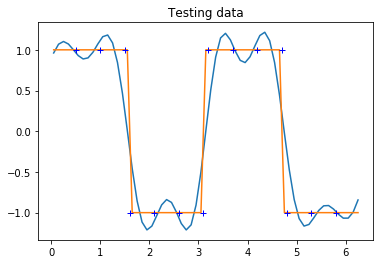

Residual error:  0.187710642954


In [27]:
"""Checking testing data error with manually chosen prototypes, 6 nodes"""
index = np.array((15,16,31,32,47,48))
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))

"""Checking testing data error with manually chosen prototypes, 12 nodes"""
index = np.array((5,10,15,16,21,26,31,32,37,42,47,48,53,58))
a = LeastSquares(trainSet, trainTargetSquare, trainSet[index])
plt.plot(testSet, a.run(testSet))
plt.plot(testSet,testTargetSquare)
plt.plot(trainSet[index], trainTargetSquare[index], "b+")
plt.title("Testing data")
plt.show()
print("Residual error: ", a.residualError(testSet, testTargetSquare))